# Réalisez une étude de santé publique avec Python
_______________________________________________________________________________________________________________________________

## Rappel du context

J'ai integré en tant que data analyste, l'équipe de chercheurs de l'Organisation des Nations Unies pour l'alimentation et l'agriculture(FAO),l'un des organes qui compose l'ONU et dont l'objectif est d' « aider à construire un monde libéré de la faim ».


Mon équipe est chargée de réaliser une étude de grande ampleur sur le thème de la sous-nutrition mondiale pendant 2017.


Le problème de la faim est complexe et peut avoir de multiples causes, différentes selon les pays. L’étape préliminaire de cette étude sera donc d’établir un “état de l’art” des recherches déjà publiées, mais également de mener une étude statistique destinée à orienter les recherches vers des pays particuliers, et de mettre en lumière différentes causes de la faim.

##  La population mondiale en 2017 selon les données de la FAO

In [1]:
#Importation des librairies Numpy et Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Chargement du dataframe de la population mondiale, fichier 'population.csv'
population = pd.read_csv('population.csv')
population.head(10)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
5,Afghanistan,2018,37171.921
6,Afrique du Sud,2013,53687.121
7,Afrique du Sud,2014,54544.186
8,Afrique du Sud,2015,55386.367
9,Afrique du Sud,2016,56207.646


In [3]:
#Population Mondiale pour l'année 2017
population_mondiale = (population['Valeur'][population['Année']==2017]*1000).sum()
population_mondiale

7548134111.0

**7,5 milliards de personnes en 2017.** 

L'estimation est totalement cohérente face au chiffre actuel 7,87 milliards en 2021.

In [4]:
# creation de la dataframe df_sousnut apartir du fichier sous_nutrition.csv
df_sousnut=pd.read_csv('sous_nutrition.csv')
df_sousnut.head(10)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
5,Afghanistan,2017-2019,11.1
6,Afrique du Sud,2012-2014,2.2
7,Afrique du Sud,2013-2015,2.5
8,Afrique du Sud,2014-2016,2.8
9,Afrique du Sud,2015-2017,3


## Estimation de la population mondiale étant en sous-nutrition en 2017



In [5]:
#Les valeurs de population sont des strings, je fais un changement vers des floats
#Les valeurs <0.1 seront considérées comme nulles dans nos calculs
df_sousnut['Valeur'] = df_sousnut['Valeur'].replace('<0.1', 0)
df_sousnut['Valeur'] = df_sousnut['Valeur'].astype('float64')

In [6]:
#Population Mondiale pour l'année 2017
pop_sousnut17 = df_sousnut['Valeur'][df_sousnut['Année'] == '2016-2018'].sum()
pop_sousnut17 = round(pop_sousnut17 *1e6,2)
pop_sousnut17

535700000.0

535 millions de personnes en 2017 sont en sous nutrition

## La proportion des personne en sous nutrition 

In [7]:
proportion_pop_sousnut2017 = round(pop_sousnut17 / population_mondiale * 100, 2)
proportion_pop_sousnut2017

7.1

**Soit 7,1% de la population mondiale est en sous nutrition en 2017.**

Contre 8,4% en 2019 et 9,9% en 2020 de la population mondiale était en situation de sous-alimentation.

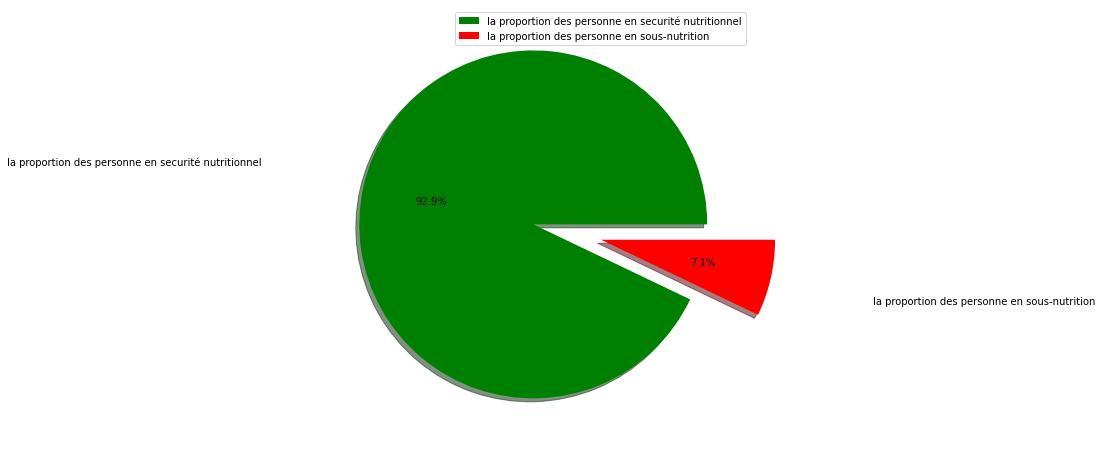

In [8]:
plt.figure(figsize = (8, 8))
x = [14.09, 1.0769]
plt.pie(x, labels = ['la proportion des personne en securité nutritionnel', 'la proportion des personne en sous-nutrition'],
           colors = ['green', 'red'],
           explode = [0, 0.4],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.6, labeldistance = 1.6,
           shadow = True)
plt.legend()

## Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [9]:
df_sousnut_pays=df_sousnut[df_sousnut['Année']=='2016-2018']
df_sousnut_pays=df_sousnut_pays.dropna()
df_sousnut_pays['Valeur']=df_sousnut_pays['Valeur']*1000
df_sousnut_pays.rename(columns={'Valeur': 'Valeur_Sousnut'}, inplace=True)
df_sousnut_pays.head()

,Zone,Année,Valeur_Sousnut
4,Afghanistan,2016-2018,10500.0
10,Afrique du Sud,2016-2018,3100.0
16,Albanie,2016-2018,100.0
22,Algérie,2016-2018,1300.0
40,Angola,2016-2018,5800.0


In [10]:
# Valeur est le pourcentage de la population sous nutrition par raport à la population par pays 
proportion_sousnut_pays=pd.DataFrame(columns=['Zone', 'Année', 'Valeur'])
proportion_sousnut_pays.head()
population17=population[population['Année']==2017]
population17.head()


,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [11]:
for index, x in df_sousnut_pays.iterrows():
    for index, y in population17.iterrows():
        if x['Zone']==y['Zone']:
            proportion_sousnut_pays=proportion_sousnut_pays.append({'Zone': x['Zone'], 'Année': x['Année'], 'Valeur': round((x['Valeur_Sousnut']/y['Valeur'])*100 ,2)}, ignore_index=True)
            
proportion_sousnut_pays.sort_values(by=['Valeur'], ascending=False, inplace=True)           
proportion_sousnut_pays.head(10)

,Zone,Année,Valeur
41,Haïti,2016-2018,48.26
82,République populaire démocratique de Corée,2016-2018,47.19
57,Madagascar,2016-2018,41.06
55,Libéria,2016-2018,38.28
53,Lesotho,2016-2018,38.25
94,Tchad,2016-2018,37.96
84,Rwanda,2016-2018,35.06
66,Mozambique,2016-2018,32.81
96,Timor-Leste,2016-2018,32.17
0,Afghanistan,2016-2018,28.93


## le nombre théorique de personnes qui pourraient être nourries. 

Les résultats seront exprimés en termes de calories, de protéines, puis en pourcentage de la population mondiale.

- Pour les Calories les calculs seront fait sur la base de 2 355 Kcal/jour, soit 859575 Kcal/an.
- Pour les Protéines les calculs seront fait sur la base de 0,85 g/kg, poids moyen de 57 kg, soit 17684 g/an.

Selon les recommandations de la FAO.


In [12]:
# charge de la disponibilité alimentaire
dispo_alimentaire=pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [13]:
#l'ajout d'une colonne pour la population par pays 
df_dispo_alimentaire= pd.merge(dispo_alimentaire,population, on='Zone')
df_dispo_alimentaire.head()



,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.2,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2013,32269.589
1,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.2,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2014,33370.794
2,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.2,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2015,34413.603
3,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.2,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2016,35383.032
4,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.2,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017,36296.113


In [14]:
#renomer la colonne valeur en population
# projection pour selectionner la disponibilité alimentaire par produits et la population par pays pour l'année 2017.
df_dispo_alimentaire.rename(columns={'Valeur':'Population'}, inplace=True)
df_dispo_alimentaire.head()

df_dispo_alimentaire=df_dispo_alimentaire[df_dispo_alimentaire['Année']==2017]
df_dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
4,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017,36296.113
10,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017,36296.113
16,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
22,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
28,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113


In [15]:
#Ajout des Series "Disponibilités alimentaire en Kcal et Kg" et "Disponibilités protéines en Kg"
df_dispo_alimentaire['Disponibilité alimentaire (Kcal/an)'] = df_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] \
* 365 * df_dispo_alimentaire['Population'] 

df_dispo_alimentaire['Disponibilité de protéines en quantité (Kg/an)']= df_dispo_alimentaire['Disponibilité de protéines en quantité (g/personne/jour)']\
* 365 * .001 * df_dispo_alimentaire['Population']

df_dispo_alimentaire['Disponibilité alimentaire en quantité (Kg/an)'] = df_dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'] \
* df_dispo_alimentaire['Population']


In [16]:
#Projection des données sur les valeurs demandées
df2 = df_dispo_alimentaire[['Zone','Produit','Origine', 'Disponibilité alimentaire (Kcal/an)', \
           'Disponibilité alimentaire en quantité (Kg/an)', 'Disponibilité de protéines en quantité (Kg/an)', \
           'Disponibilité intérieure', 'Aliments pour animaux', 'Pertes']].reset_index()

df2.head()

,index,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (Kg/an),Disponibilité de protéines en quantité (Kg/an),Disponibilité intérieure,Aliments pour animaux,Pertes
0,4,Afghanistan,Abats Comestible,animale,6.624041e+07,62429.31436,10201.022559,53.0,NaN,NaN
1,10,Afghanistan,"Agrumes, Autres",vegetale,1.324808e+07,46821.98577,264.961625,41.0,NaN,2.0
2,16,Afghanistan,Aliments pour enfants,vegetale,1.324808e+07,2177.76678,397.442437,2.0,NaN,NaN
3,22,Afghanistan,Ananas,vegetale,0.000000e+00,0.00000,NaN,0.0,NaN,NaN
4,28,Afghanistan,Bananes,vegetale,5.299232e+07,97999.50510,662.404062,82.0,NaN,NaN


In [17]:
#Création du dataframe (df_dispoalimentaire) selon la disponibilité alimentaire mondiale en Kcal et Kg de protéines
df_dispo_mondial = df_dispo_alimentaire[['Disponibilité alimentaire (Kcal/an)', 'Disponibilité de protéines en quantité (Kg/an)']]
df_dispo_mondial.head()

,Disponibilité alimentaire (Kcal/an),Disponibilité de protéines en quantité (Kg/an)
4,6.624041e+07,10201.022559
10,1.324808e+07,264.961625
16,1.324808e+07,397.442437
22,0.000000e+00,NaN
28,5.299232e+07,662.404062


## Résultat en termes de calories

In [18]:
humain_nourris_dispoalim_kcal = round(((df_dispo_alimentaire['Disponibilité alimentaire (Kcal/an)']).sum() / 859575), 2)
humain_nourris_dispoalim_kcal

8882796.02

**Plus de 8 Millions de personnes** pourraient être nourris à partir de la disponibilité alimentaire.

In [19]:
pourcentage_humain_nourris_dispoalim_cal = round((humain_nourris_dispoalim_kcal*1000 / population_mondiale * 100),2)
pourcentage_humain_nourris_dispoalim_cal

117.68

Soit **117,68%** de la population mondiale.

## Résultat en termes de proteins

In [20]:
#Ma disponibilité de protéines est exprimée en Kg, elle sera *1000 pour avoir une base en grammes
humain_nourris_dispoalim_kgprot = round(((df_dispo_alimentaire['Disponibilité de protéines en quantité (Kg/an)']).sum() / 17.68), 2)
humain_nourris_dispoalim_kgprot

12119810.0

**Plus de 12 Millions de personnes** pourraient être nourris à partir de la disponibilité alimentaire.

In [21]:
pourcentage_humain_nourris_dispoalim_gprot = round((humain_nourris_dispoalim_kgprot*1000 / population_mondiale * 100),2)
pourcentage_humain_nourris_dispoalim_gprot

160.57

Soit **160,57%** de la population mondiale.

## Le nombre theorique de personnes qui pourraient être nourries, à partir de la disponobilité végétale seulement.

In [22]:
#Création du dataframe (df8) à partir du dataframe des bilans alimentaires (df2) 
#Projection et Réduction des données pour cibler uniquement les produits végétaux
df_dispo_végétale=df_dispo_alimentaire[df_dispo_alimentaire['Origine'] == 'vegetale']
df_dispo_végétale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Disponibilité alimentaire (Kcal/an),Disponibilité de protéines en quantité (Kg/an),Disponibilité alimentaire en quantité (Kg/an)
10,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,2.0,3.0,NaN,NaN,NaN,2017,36296.113,1.324808e+07,264.961625,46821.98577
16,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,1.324808e+07,397.442437,2177.76678
22,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,0.000000e+00,NaN,0.00000
28,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,5.299232e+07,662.404062,97999.50510
40,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,0.000000e+00,0.000000,3266.65017


### Résultat en termes de calories

In [23]:
humain_nourris_veg_kcal = round(df_dispo_végétale['Disponibilité alimentaire (Kcal/an)'].sum() / 859575, 2)
humain_nourris_veg_kcal*1000

7329411550.0

**Plus de 7 milliards** de personnes pouraient êtres nourries à partir de la disponibilité végétale.

In [24]:
pourcentage_humain_nourris_veg_cal = round((humain_nourris_veg_kcal*1000 / population_mondiale * 100),2)
pourcentage_humain_nourris_veg_cal

97.1

Soit **97,1%** de la population mondiale.

###  Résultat en termes de protéines

In [25]:
humain_nourris_veg_kgprot = round(df_dispo_végétale['Disponibilité de protéines en quantité (Kg/an)'].sum() / 17.68, 2)
humain_nourris_veg_kgprot*1000

7391870520.0

**Plus de 7 milliards** de personnes qui pouraient êtres nouries à partir de la disponiblité végétale.

In [26]:
pourcentage_humain_nourris_veg_gprot = round((humain_nourris_veg_kgprot*1000 / population_mondiale * 100),2)
pourcentage_humain_nourris_veg_gprot

97.93

Soit **97,93%** de la population mondiale. 

## La disponibilité interieure

La disponibilité intérieure constitue le premier pilier de la sécurité alimentaire. Les approvisionnements
de la disponibilité d’un pays proviennent généralement de la production nationale et des importations,
et parfois des stocks. La disponibilité intérieure désigne la quantité de produits disponible pour les
utilisations intérieures. Elle est calculée comme suit :

 **Disponibilité intérieure = Production + Importations - Exportations + Evolutions des stocks**

 **Disponibilité intérieure= Nourriture +  Semences + Pertes + Aliments pour animaux + Autre utilisation + Traitement**

 
 

 **Nourriture** = Disponibilité intérieure - Semences - Pertes - Aliments pour animaux - Autre utilisation - Traitement

 **Aliments pour animaux** = Nourriture - disponibilité interieur + semence + pertes + autre utilistion + traitement

    
 **pertes** = Nourritue - disponibilité limentaire + aliments pour animaux + semence + autre utilisation + traitement


### la disponibilité intérieure 

In [27]:
dispo_interieure = df_dispo_alimentaire["Disponibilité intérieure"].sum()
dispo_interieure

9733927.0

La disponibilité intérieure mondiale est plus de **9 million de tonnes**

### La proportion de l'alimentation animale 

In [28]:
alimentation_animal = df_dispo_alimentaire["Aliments pour animaux"].sum()
alimentation_animal

1288002.0

In [51]:
proportion_alimentation_animal = alimentation_animal/dispo_interieure
proportion_alimentation_animal*100

13.232090193402929

**13,23%** de l'alimentation intérieure est distinée au animaux.

### La proportion de l'alimentation humaine

In [30]:
alimentation_humaine = df_dispo_alimentaire["Nourriture"].sum()
alimentation_humaine

4805525.0

In [50]:
proportion_alimentation_humaine = alimentation_humaine/dispo_interieure
proportion_alimentation_humaine*100

49.36882103184049

**49,36%** de l'alimentation intérieure est distinée à l'être humain. 

### La proportion de l'alimentation perdue

In [32]:
alimentation_perdue = df_dispo_alimentaire["Pertes"].sum()
alimentation_perdue

452283.0

In [49]:
proportion_alimentation_perdue = alimentation_perdue/dispo_interieure
proportion_alimentation_perdue*100

4.646459748465341

**4,64%** de l'alimentation intérieure est perdue

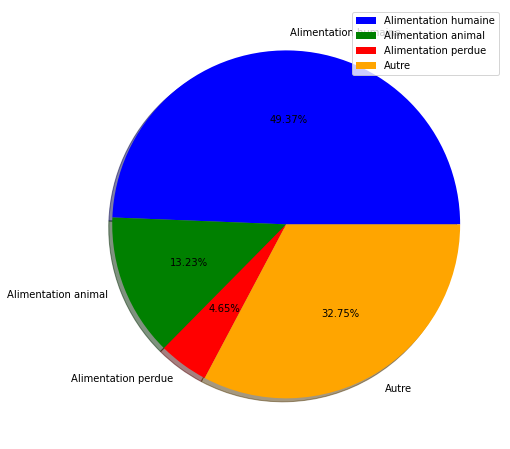

In [34]:
plt.figure(figsize = (8, 8))
x = [ 49.368, 13.23, 4.646,32.754]
plt.pie(x, labels = ['Alimentation humaine', 'Alimentation animal', 'Alimentation perdue', 'Autre'],
           colors = ['blue', 'green', 'red', 'orange'],
           explode = [0, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.6,
           shadow = True)
plt.legend()

## L'utilisation de la disponibilité interieure des céreals

In [35]:
# inserer la colonne is_cereal dans la dataframe df_dispo_alimentaire  
is_cereals=[]
l_cereals= ["Blé","Seigle","Orge","Avoine","Maïs","Riz","Sarrasin","Sorgho","Mil","Quinoa","Céréales, Autres"]

for row in df_dispo_alimentaire['Produit'] :
    if row in l_cereals :
        is_cereals.append(True)
    else : 
        is_cereals.append(False)
              

In [36]:
df_dispo_alimentaire.insert(4,'is_cereal', '')
df_dispo_alimentaire['is_cereal']=is_cereals
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,is_cereal,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Disponibilité alimentaire (Kcal/an),Disponibilité de protéines en quantité (Kg/an),Disponibilité alimentaire en quantité (Kg/an)
4,Afghanistan,Abats Comestible,animale,NaN,False,NaN,5.0,1.72,0.20,0.77,...,NaN,53.0,NaN,NaN,NaN,2017,36296.113,6.624041e+07,10201.022559,62429.31436
10,Afghanistan,"Agrumes, Autres",vegetale,NaN,False,NaN,1.0,1.29,0.01,0.02,...,2.0,3.0,NaN,NaN,NaN,2017,36296.113,1.324808e+07,264.961625,46821.98577
16,Afghanistan,Aliments pour enfants,vegetale,NaN,False,NaN,1.0,0.06,0.01,0.03,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,1.324808e+07,397.442437,2177.76678
22,Afghanistan,Ananas,vegetale,NaN,False,NaN,0.0,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,0.000000e+00,NaN,0.00000
28,Afghanistan,Bananes,vegetale,NaN,False,NaN,4.0,2.70,0.02,0.05,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,5.299232e+07,662.404062,97999.50510


In [37]:
#Création du dataframe (df100) selon la restriction des produits céréaliers 
df_cereals = df_dispo_alimentaire[df_dispo_alimentaire.is_cereal == True]
df_cereals.head()

,Zone,Produit,Origine,Aliments pour animaux,is_cereal,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Disponibilité alimentaire (Kcal/an),Disponibilité de protéines en quantité (Kg/an),Disponibilité alimentaire en quantité (Kg/an)
46,Afghanistan,Blé,vegetale,NaN,True,NaN,1369.0,160.23,4.69,36.91,...,775.0,5169.0,322.0,NaN,-350.0,2017,36296.113,1.813662e+10,488986.678753,5.815726e+06
76,Afghanistan,"Céréales, Autres",vegetale,NaN,True,NaN,0.0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,2017,36296.113,0.000000e+00,0.000000,0.000000e+00
196,Afghanistan,Maïs,vegetale,200.0,True,NaN,21.0,2.50,0.30,0.56,...,31.0,312.0,5.0,NaN,NaN,2017,36296.113,2.782097e+08,7418.925497,9.074028e+04
244,Afghanistan,Orge,vegetale,360.0,True,NaN,26.0,2.92,0.24,0.79,...,52.0,514.0,22.0,NaN,0.0,2017,36296.113,3.444501e+08,10465.984184,1.059846e+05
406,Afrique du Sud,Avoine,vegetale,8.0,True,NaN,5.0,0.75,0.09,0.16,...,1.0,28.0,1.0,NaN,0.0,2017,57009.756,1.040428e+08,3329.369750,4.275732e+04


## Proportion des céréales destinée à l'alimentation humaine sur l'année 2017(en terme de poid)

In [38]:
cereal_humain = df_cereals['Nourriture'].sum() 
cereal_humain

620594.0

In [39]:
#alimentation_humain= dispo interieur que pour cereal, result 17,63% humaine, 69,67% animal
proportion_cereal_humain= cereal_humain/alimentation_humaine
proportion_cereal_humain * 100

12.914176910951458

**12.91%** de l'alimentation humaine sont des céréales.

## Proportion des céréales destinée à l'alimentation animal sur l'année 2017(en terme de poid)

In [40]:
 #valeur exprimée en Milliers de tonnes / an
cereal_animal = df_cereals['Aliments pour animaux'].sum() 
cereal_animal

822744.0

In [41]:
proportion_cereal_animal=cereal_animal/alimentation_animal
proportion_cereal_animal*100

63.87754056282521

**63.87%** de l'alimentation animal sont des céréal.

## L'exemple du Manioc, son exportation et la sous nutrition dans le pays le plus exportateur du Manioc dans le monde.

### Les pays exporteur du manioc dans le monde sur l'année 2017

In [62]:
#Création d'un dataframe (df_pays_manioc) pour identifier et quantifier ces pays
df_pays_manioc = (df_dispo_alimentaire[(df_dispo_alimentaire['Produit'] == 'Manioc') & (df_dispo_alimentaire['Exportations - Quantité'] != 0)])
df_pays_manioc = df_pays_manioc.dropna(subset=['Exportations - Quantité'])
df_pays_manioc = df_pays_manioc[['Zone', 'Exportations - Quantité']].sort_values(by='Exportations - Quantité', ascending=False)
df_pays_manioc.head()

,Zone,Exportations - Quantité
81724,Thaïlande,25214.0
87328,Viet Nam,8973.0
38008,Indonésie,820.0
15994,Cambodge,254.0
64516,Paraguay,164.0


In [43]:
df_pays_manioc['Zone'].nunique()

43

Les 3 pays qui exportent le plus le Manioc sont le **Thaïlande**, le **Viet Nam** et l'**Indonésie**.

### Proportion des exportations du Manioc / production dans le  Thaïlande.

In [44]:
#Création d'un dataframe (df_thai_manioc) à partir des bilans alimentaires du dataframe df_dispo_alimentaire
#Restriction suivant le Pays Thaïlande et le produit Manioc
df_thai_manioc = df_dispo_alimentaire[(df_dispo_alimentaire['Zone'] == 'Thaïlande') & (df_dispo_alimentaire['Produit'] == 'Manioc')]
df_thai_manioc = df_thai_manioc[['Zone', 'Produit', 'Exportations - Quantité','Production']]
df_thai_manioc

,Zone,Produit,Exportations - Quantité,Production
81724,Thaïlande,Manioc,25214.0,30228.0


In [66]:
#La valeur "Exportations - Quantité"  sont exprimées en Milliers de tonnes
#Conversion en tonnes
export_manioc_thai = 25214.0 * 1000000
print(export_manioc_thai)

#La valeur "Production" sont exprimées en Milliers de tonnes
#Conversion en tonnes
produ_manioc = 30228.0 * 1000000
print(produ_manioc)

25214000000.0
30228000000.0


**25 Milliards** de tonnes de Manioc exportées par le Thaïlande, contre **30 Milliards de tonnes** de Manioc produite en Thaïlande.

In [47]:
(export_manioc_thai/produ_manioc)*100

83.41272991928014

En conclusion le Thaillande exporte plus de **83%** du Manioc produit dans son pays, Alos que **7,7%** de sa population est en sous nutrition

## Les pays qui ont le plus bénéficiés d’aide depuis 2013

In [60]:
aide_alimentaire=pd.read_csv('aide_alimentaire.csv') 

In [69]:
aide_alimentaire=aide_alimentaire.groupby(by=['Pays bénéficiaire']).sum()
pays_plus_beneficies=aide_alimentaire.sort_values(by=['Pays bénéficiaire'],ascending=False)

pays_plus_beneficies.head()

,,Valeur
Année,Pays bénéficiaire,
66460,Éthiopie,1381294
10065,Équateur,1362
4026,Égypte,1122
38263,Zimbabwe,62570
8054,Zambie,3026


## Les pays ayant le plus/le moins de disponibilité/habitant

In [52]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [53]:
# disponibilité alimentaire kcal/an
df=dispo_alimentaire[['Zone', 'Disponibilité intérieure']].groupby(['Zone']).sum()
df['Disponibilité intérieure']=df['Disponibilité intérieure']*1000
df.head()

,Disponibilité intérieure
Zone,
Afghanistan,13515000.0
Afrique du Sud,61256000.0
Albanie,4758000.0
Algérie,42630000.0
Allemagne,162275000.0


In [54]:
population17['Valeur']=population17['Valeur']*1000
population17.insert(3,'ratio_dispo_habitant','')
population17.head()


C:\Users\asmaa\AppData\Local\Temp/ipykernel_2244/988344562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population17['Valeur']=population17['Valeur']*1000


,Zone,Année,Valeur,ratio_dispo_habitant
4,Afghanistan,2017,36296113.0,
10,Afrique du Sud,2017,57009756.0,
16,Albanie,2017,2884169.0,
22,Algérie,2017,41389189.0,
28,Allemagne,2017,82658409.0,


In [55]:
df=pd.merge(df,population17, on='Zone')
df.head()

,Zone,Disponibilité intérieure,Année,Valeur,ratio_dispo_habitant
0,Afghanistan,13515000.0,2017,36296113.0,
1,Afrique du Sud,61256000.0,2017,57009756.0,
2,Albanie,4758000.0,2017,2884169.0,
3,Algérie,42630000.0,2017,41389189.0,
4,Allemagne,162275000.0,2017,82658409.0,


In [58]:
df['ratio_dispo_habitant']=df['Valeur']/df['Disponibilité intérieure']
df.sort_values(by=['ratio_dispo_habitant'], ascending=False, inplace=True) 
df.head(10)

,Zone,Disponibilité intérieure,Année,Valeur,ratio_dispo_habitant
163,Yémen,9782000.0,2017,27834819.0,2.845514
150,Tchad,5304000.0,2017,15016753.0,2.831213
152,Timor-Leste,447000.0,2017,1243258.0,2.781338
0,Afghanistan,13515000.0,2017,36296113.0,2.685617
170,Éthiopie,44014000.0,2017,106399924.0,2.417411
56,Gambie,940000.0,2017,2213889.0,2.355201
87,Libéria,2002000.0,2017,4702226.0,2.348764
62,Guinée-Bissau,786000.0,2017,1828145.0,2.325884
14,Bangladesh,72757000.0,2017,159685424.0,2.194777
84,Lesotho,966000.0,2017,2091534.0,2.165149


Les pays ayont le plus de disponibilité intérieure par abitant.

In [59]:
df.sort_values(by=['ratio_dispo_habitant'], ascending=True, inplace=True) 
df.head(10)

,Zone,Disponibilité intérieure,Année,Valeur,ratio_dispo_habitant
50,Eswatini,6.467000e+06,2017,1124805.0,0.173930
23,Brésil,1.033314e+09,2017,207833823.0,0.201133
63,Guyana,3.290000e+06,2017,775222.0,0.235630
17,Belize,1.542000e+06,2017,375769.0,0.243689
98,Maurice,4.767000e+06,2017,1264499.0,0.265261
44,Danemark,1.974900e+07,2017,5732274.0,0.290256
26,Bélarus,2.752200e+07,2017,9450231.0,0.343370
51,Fidji,2.499000e+06,2017,877459.0,0.351124
10,Australie,6.699200e+07,2017,24584620.0,0.366978
88,Lituanie,7.467000e+06,2017,2845414.0,0.381065


Les pays ayont le moins de disponibilité intérieure par abitant.

# Conclusion 

A partir de cette analyse et selon le rapport de la FAO on peut déduidre que la faim dans le monde est malheureusement en hausse. Chaque jour, plus de 800 millions de personnes cherchent désespérément à se procurer un peu de nourriture et risquent de mourir de faim. 

La mission Faim Zero vise à ramener ce chiffre ahurissant à ZÉRO.

La FAIM ZÉRO est le deuxième des 17 Objectifs de développement durable (ODD) fixés par l’ONU et soutenus par toutes les organisations du système des Nations Unies.

**Mais est ce qu'on est actuellement dans la mesure d'atteindre cet objectif?!**



- La pandèmie covid-19 qui a agi comme amplificateur, En 2020, la faim a grimpé en flèche en termes absolus et proportionnels, dépassant la croissance démographique : OMS estime qu'environ 9,9 % de l'ensemble de la population était sous-alimentée en 2020.
- La guerre en Ukraine menace la sécurité alimentaire, ce conflit armé affectera forcément les fonctionnements des marchés céréaliers et des marchés des fertilisants.

Compte tenu de ces dernières causes imprèvue, il faudra un effort considérable pour parvenir à honorer l'engagement qui a été pris pour atteindre les objectifs fixés pour les indicateurs nutritionnels d'ici à 2030.